# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 300)



import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings




In [7]:
df = pd.read_csv('kc_house_data_train.csv', index_col = 1)
df.columns

Index(['Unnamed: 0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,
2591820310,0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627300195,17285,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
8819900270,17286,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
3816300095,17287,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [422]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


In [423]:
df.price.max()

7700000.0

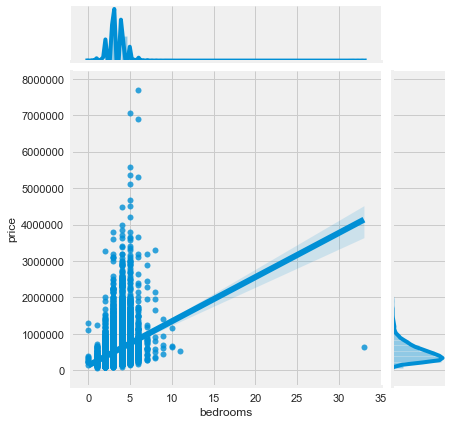

In [424]:
sns.jointplot(x = 'bedrooms', y = 'price', data = df, kind = 'reg')


In [5]:
_df = df.copy()

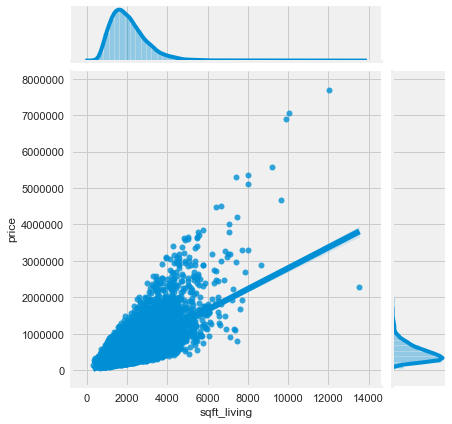

In [184]:
sns.jointplot(x = 'sqft_living', y = 'price', data = _df, kind = 'reg')

In [550]:
df['price_log'] = np.log(df['price'])
df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_living_sq'] = (df['sqft_living'])**2

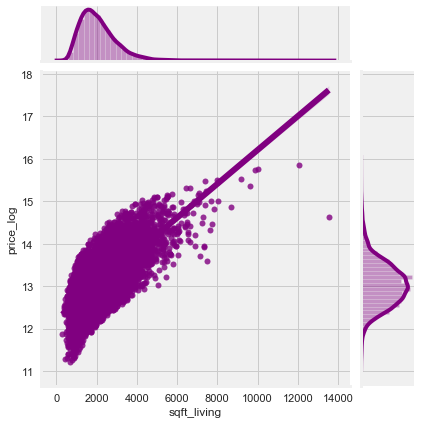

In [185]:
sns.jointplot(x = 'sqft_living', y = 'price_log', data = _df, kind = 'reg', color = 'purple')

In [88]:
df['sq_ft_ratio'] = (df['sqft_living'])/(df['sqft_lot'])

In [92]:
df['sq_ft_ratio'].describe()


count    17274.000000
mean         0.320246
std          0.261986
min          0.000610
25%          0.156537
50%          0.246434
75%          0.401961
max          2.187500
Name: sq_ft_ratio, dtype: float64

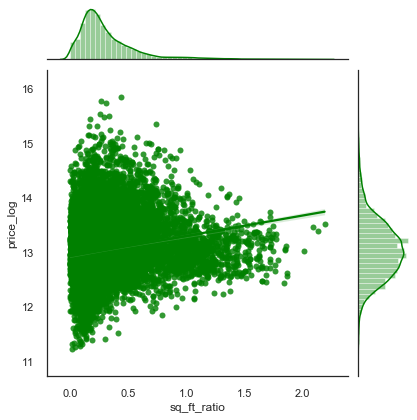

In [94]:
sns.jointplot(x = 'sq_ft_ratio', y = 'price_log', data = df, kind = 'reg', color = 'green')

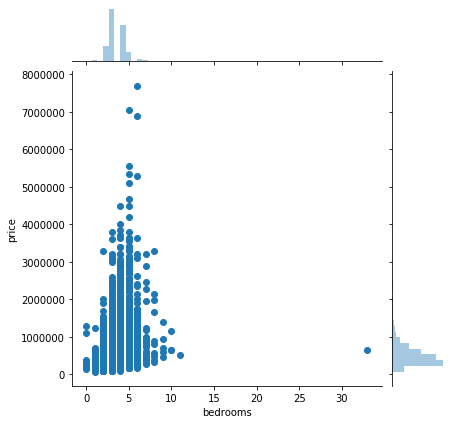

In [10]:
sns.jointplot(x = 'bedrooms', y = 'price', data = df)

In [425]:
#row_groups = df['view'], df[ 'bedrooms']
#for i in row_groups:
    #plots = sns.pairplot(data= df, y_vars = df['price'], x_vars = i, kind='reg', height = 3)

In [426]:
pd.set_option('display.max_columns', 500)

In [427]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [428]:
dummies = pd.get_dummies(df['view'])
dummies.values[dummies != 0] = df['view']

df['view'].unique()

array([0, 2, 3, 4, 1])

In [429]:
df['bedrooms'].unique()

array([ 4,  5,  3,  2,  6,  1,  7,  0,  8, 11,  9, 10, 33])

In [430]:
#looked up the latitiude and longitude of the 33 bedroom house, it is actually a 3 bedroom house
#edited to save the data

df['bedrooms'] = (df['bedrooms'].replace(33, 3))
df['bedrooms'].unique()

array([ 4,  5,  3,  2,  6,  1,  7,  0,  8, 11,  9, 10])

In [431]:
#dropped bedrooms 10, there were 3 of them and they were not all correct according to internet data
index = df[df['bedrooms'] == 10].index
index

Int64Index([3680, 11181, 17114], dtype='int64')

In [432]:
df.drop(index, inplace = True)

In [433]:
#11 bedroom house was off from all data we found using lat and long, not the correct in any of the columns
index = df[df['bedrooms'] == 11].index


In [434]:
df.drop(index, inplace = True)


In [435]:
#12 rows were dropped, Joey vetoed me looking them all up one by one on Google... yes I would have done it. 

index = df[df['bedrooms'] == 0].index
index

Int64Index([483, 1120, 2430, 3032, 3609, 5424, 6409, 9286, 10067, 10074, 13989,
            15733],
           dtype='int64')

In [436]:
df.drop(index, inplace = True)

In [437]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [438]:

df.drop(columns = ['date', 'lat', 'long', 'sqft_living15','sqft_lot15'], inplace = True)


In [439]:
df['price'] = df['price'].astype(int)

In [440]:
df.yr_renovated.unique()


array([   0, 1998, 1983, 1989, 1985, 2002, 1999, 2010, 2015, 1990, 1972,
       2013, 1955, 2001, 2000, 2011, 1956, 2006, 1965, 1987, 2007, 1995,
       2014, 1945, 1993, 1992, 1979, 1980, 1946, 1988, 1958, 1996, 2004,
       1973, 2005, 1994, 2003, 1986, 1981, 1953, 2012, 1991, 1975, 1977,
       1978, 1968, 2009, 1984, 2008, 1967, 1997, 1974, 1982, 1963, 1969,
       1940, 1970, 1971, 1957, 1976, 1960, 1962, 1944, 1959, 1964, 1950,
       1934, 1951, 1948])

In [441]:
df.yr_built.unique()

array([1986, 1977, 1997, 1990, 2004, 1970, 1987, 2005, 1909, 1930, 1963,
       1968, 2003, 1910, 2001, 1954, 1993, 1969, 1976, 2007, 1983, 1955,
       1981, 1972, 1904, 1942, 1973, 1918, 1961, 1962, 2000, 2013, 2014,
       2009, 1953, 1960, 1994, 1900, 1999, 1949, 1980, 1944, 1921, 1998,
       1925, 1950, 1985, 1974, 1926, 1967, 1975, 1912, 1966, 2006, 1991,
       1959, 1984, 1979, 1964, 1920, 1957, 1995, 1951, 1982, 1988, 1914,
       1917, 1908, 1947, 1971, 2015, 1937, 1958, 2002, 1956, 1938, 1948,
       2008, 2010, 1936, 1907, 2012, 1978, 1941, 1965, 1992, 1927, 1929,
       1903, 1928, 1915, 1923, 1946, 1911, 1996, 1952, 1940, 1916, 1945,
       1943, 1989, 1913, 1906, 1924, 1931, 1922, 1932, 1901, 1905, 2011,
       1939, 1919, 1933, 1935, 1902, 1934])

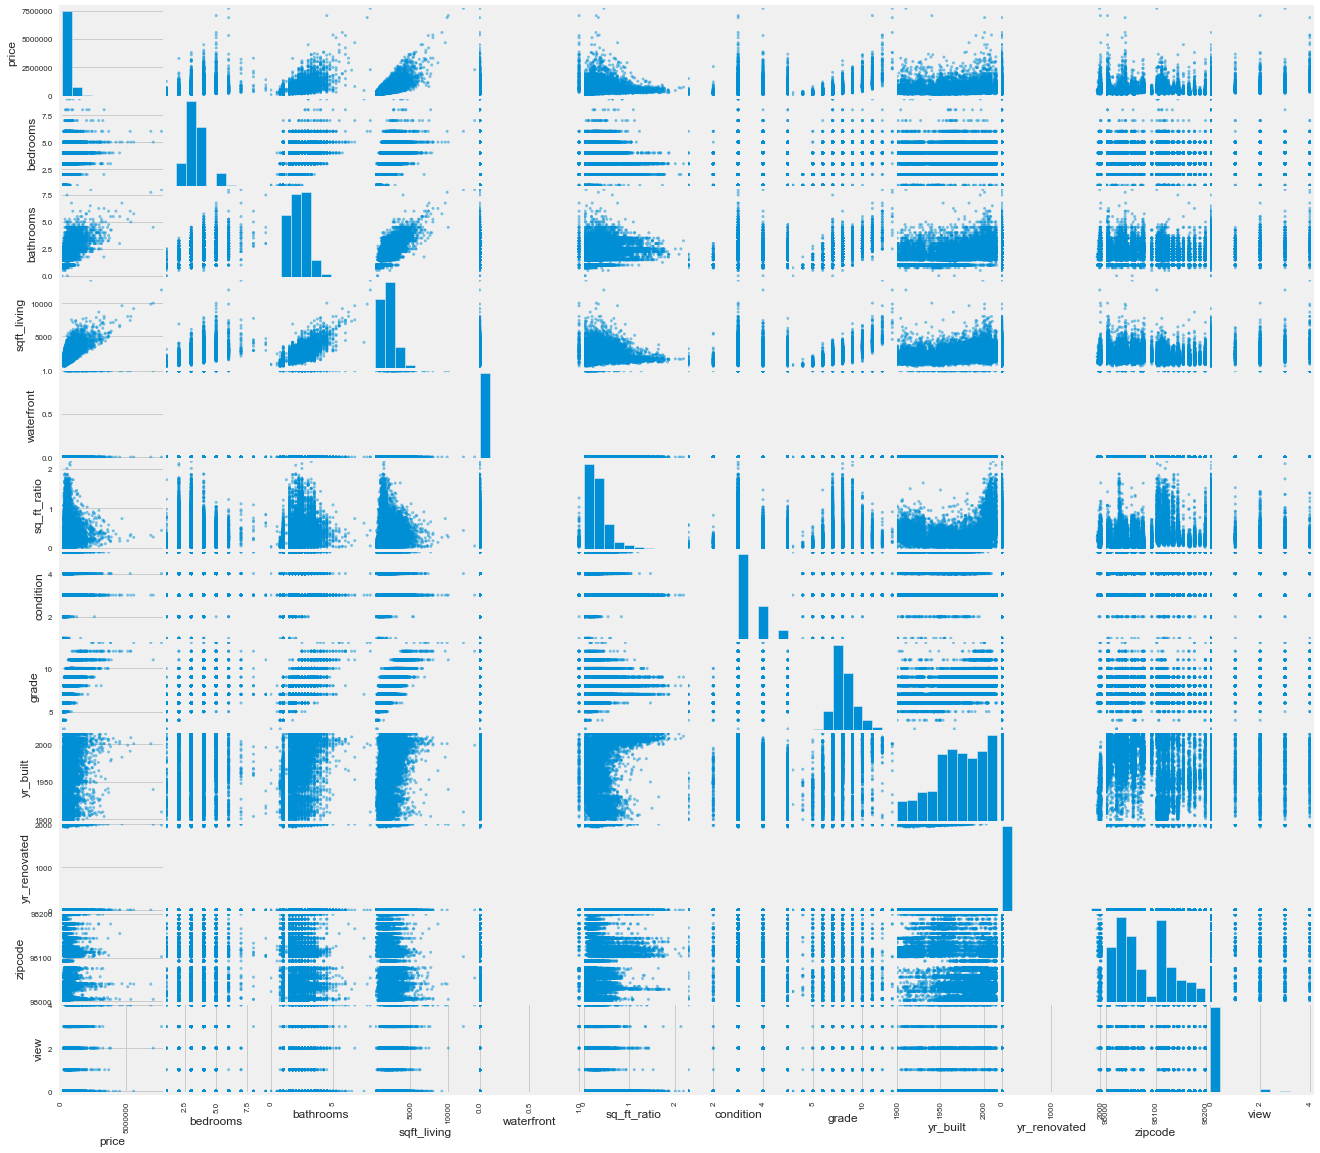

In [442]:
pd.plotting.scatter_matrix(df_price_corr,figsize  = [20, 20]);
plt.show()
    

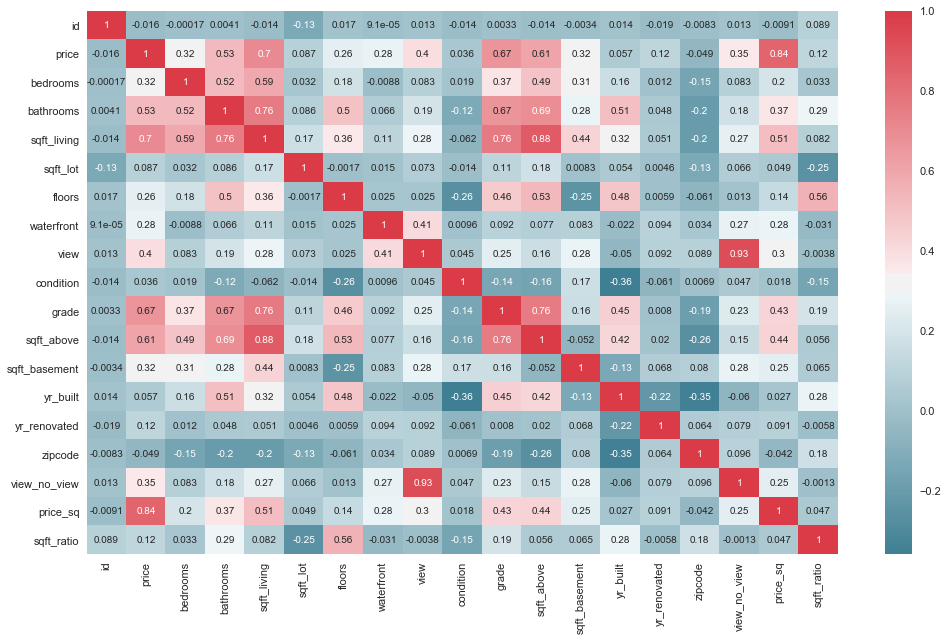

In [458]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)


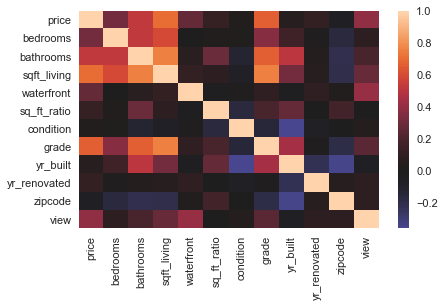

In [444]:
import seaborn as sns
sns.heatmap(df_price_corr.corr(), center=0);

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [445]:
df['view'].unique()

array([0, 2, 3, 4, 1])

In [446]:
#dummy data needed for views_no_view new column
# 0 if no view or 1 if view 

df['view_no_view'] = df['view']
df['view_no_view'].replace(2, 1, inplace = True)
df['view_no_view'].replace(3, 1, inplace = True)
df['view_no_view'].replace(4, 1, inplace = True)

In [447]:
df['view_no_view'].unique()

array([0, 1])

In [414]:
#we found that the rating of the view was better than the view_no_view thought


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#keeping the actual date is probably less helpful than the actual year
#change into year from full date %yr 

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [249]:
#options
#check yes for renovated no for not
#pre-war or not prewar
#renovated yes no
#ratio of sq ft to lot size
#ratio (sqft living + basement)/lotsize 


#df['prewar'] = df['year_built]'].map(lambda x: )
#df['renovated'] df


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [457]:
# your code here

#log price
#or square 

df['sqft_ratio'] = (df['sqft_living'])/(df['sqft_lot'])

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [35]:
# your code here
#ask albert

#view is our dummy variable 
#we did this above 


In [451]:
df['price_sq'] = (df['price'])**2


In [452]:
df['price_sq']

0         133225000000
1         748225000000
2        1077444000000
3        2220100000000
4         505521000000
             ...      
17285     562500000000
17286     193600000000
17287      96100000000
17288     182756250000
17289     121104000000
Name: price_sq, Length: 17274, dtype: int64

In [453]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'view_no_view',
       'price_sq'],
      dtype='object')

In [612]:
subset = ['bedrooms','bathrooms', 'waterfront', 'sqft_ratio', 'floors',
              'grade', 'yr_built', 'view', 'sqft_basement', 'sqft_above']

subset3 = ['bedrooms', 'bathrooms', 'condition','sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement']

subset2 = ['price','bedrooms','bathrooms', 'sqft_living', 'waterfront', 'sqft_ratio',
          'condition', 'grade', 'yr_built','yr_renovated',
           'zipcode', 'view']


df_price_corr = df[subset2]
df_features = df[subset]
target = df['price']
len(subset)
#took out floors

10

In [613]:
corr_check = df.corr()

In [614]:
#cheking for above .7 in correlation of features

corr_check['sqft_above'] 

#multi col found: bathrooms/sqft_living 0.7566
#sqft_living/grade .763
#sqft_living/sqft_above .876
#removed sqft_living

id                -0.013806
price              0.607592
bedrooms           0.493067
bathrooms          0.688813
sqft_living        0.876632
sqft_lot           0.181453
floors             0.528800
waterfront         0.077244
view               0.164722
condition         -0.158215
grade              0.758448
sqft_above         1.000000
sqft_basement     -0.051585
yr_built           0.424832
yr_renovated       0.020268
zipcode           -0.259773
view_no_view       0.147089
price_sq           0.436386
sqft_ratio         0.056143
price_log          0.604930
sqft_living_log    0.831689
sqft_living_sq     0.813642
Name: sqft_above, dtype: float64

In [615]:
#look up multicollinearity problems in learn 
#runs each pair and tells you the collinearity

In [624]:
from sklearn.preprocessing import PolynomialFeatures
#
poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)



In [625]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     213.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:44:38   Log-Likelihood:            -2.3375e+05
No. Observations:               17274   AIC:                         4.680e+05
Df Residuals:                   17018   BIC:                         4.700e+05
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.755e+07   1.22e+07     -4.706      0.000   -8.15e+07   -3.36e+07
x2          6.686e+07   1.94e+07      3.455      0.001    2.89e+07    1.05e+08
x3          2.679e+05   4.78e+05      0.560      0.575   -6.69e+05    1.21e+06
x4         -2.054e+07   7.22e+06     -2.846      0.004   -3.47e+07    -6.4e+06
x5         -7.739e+07   2.39e+07     -3.238      0.001   -1.24e+08   -3.05e+07
x6          6.803e+06   1.31e+07      0.521      0.603   -1.88e+07    3.24e+07
x7         -1.533e+04    4.2e+04     -0.365      0.715   -9.77e+04     6.7e+04
x8         -1.715e+07   1.23e+07     -1.388      0.165   -4.14e+07    7.06e+06
x9         -5.697e+04   2.73e+04     -2.084      0.037   -1.11e+05   -3378.149
x10         1.285e+05   2.17e+04      5.913      0.000    8.59e+04    1.71e+05
x11        -4.308e+05    1.4e+05     -3.086      0.002   -7.04e+05   -1.57e+05
x12        -3.092e+05    3.6e+05     -0.859      0.391   -1.02e+06    3.97e+05
x13        -6.407e+05   1.29e+06     -0.497      0.619   -3.17e+06    1.89e+06
x14        -1.466e+05   9.12e+05     -0.161      0.872   -1.93e+06    1.64e+06
x15         5.442e+04   5.56e+05      0.098      0.922   -1.04e+06    1.15e+06
x16         1.336e+05   2.27e+05      0.589      0.556   -3.11e+05    5.78e+05
x17         5.984e+04   1.26e+04      4.757      0.000    3.52e+04    8.45e+04
x18         1.455e+05   2.44e+05      0.597      0.551   -3.32e+05    6.23e+05
x19         -389.4757    503.894     -0.773      0.440   -1377.160     598.208
x20          898.8142    424.382      2.118      0.034      66.982    1730.646
x21         6.121e+05   3.55e+05      1.722      0.085   -8.46e+04    1.31e+06
x22        -7.445e+06   1.74e+06     -4.284      0.000   -1.09e+07   -4.04e+06
x23        -2.102e+06   1.39e+06     -1.517      0.129   -4.82e+06    6.14e+05
x24        -1.746e+06   8.55e+05     -2.041      0.041   -3.42e+06   -6.89e+04
x25        -2.115e+05   3.49e+05     -0.605      0.545   -8.96e+05    4.73e+05
x26        -6.787e+04   1.99e+04     -3.410      0.001   -1.07e+05   -2.89e+04
x27        -3.022e+05   3.51e+05     -0.860      0.390   -9.91e+05    3.86e+05
x28        -3048.8605    791.088     -3.854      0.000   -4599.475   -1498.246
x29         1566.5878    640.993      2.444      0.015     310.176    2823.000
x30         2.737e+05   4.79e+05      0.572      0.567   -6.64e+05    1.21e+06
x31        -2.114e+07   9.83e+06     -2.151      0.031   -4.04e+07   -1.88e+06
x32         1.102e+07   3.01e+06      3.661      0.000    5.12e+06    1.69e+07
x33         1.909e+06   9.54e+05      2.001      0.045    3.91e+04    3.78e+06
x34        -1.136e+04   5754.222     -1.974      0.048   -2.26e+04     -77.417
x35         1.656e+06   2.13e+06      0.776      0.438   -2.53e+06    5.84e+06
x36         7690.5691   2429.548      3.165      0.002    2928.403    1.25e+04
x3

In [627]:
#Find R2 

r2 =  model3.score(df_poly3, target)
print('R^2:', model3.score(df_poly3, target))


AttributeError: 'OLSResults' object has no attribute 'score'

In [618]:
#Find adjustted R2 

n = len(df) #number observations
n2 = len(subset)#number features
adj_r2 = (1 - (1 - r2) * ((n - 1) / 
          (n - n2 - 1)))

In [619]:
print ('Adj. R2: ', adj_r2)

Adj. R2:  0.7641720593044713


In [621]:
y = df['price']
x =df_features
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.198e+04
Date:                Sat, 25 Jul 2020   Prob (F-statistic):                        0.00
Time:                        22:42:42   Log-Likelihood:                     -2.3801e+05
No. Observations:               17274   AIC:                                  4.760e+05
Df Residuals:                   17264   BIC:                                  4.761e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -2.74e+04   2529.739    -10.830      0.000   -3.24e+04   -2.24e+04
bathrooms     -2.312e+04   3968.639     -5.825      0.000   -3.09e+04   -1.53e+04
waterfront     6.104e+05   2.19e+04     27.859      0.000    5.67e+05    6.53e+05
sqft_ratio     1.234e+05   9254.691     13.333      0.000    1.05e+05    1.42e+05
floors        -5.183e+04   5533.787     -9.366      0.000   -6.27e+04    -4.1e+04
grade          1.112e+05   2617.096     42.497      0.000    1.06e+05    1.16e+05
yr_built       -287.8371      8.615    -33.411      0.000    -304.724    -270.951
view           5.917e+04   2674.328     22.126      0.000    5.39e+04    6.44e+04
sqft_basement   210.6502      5.541     38.018      0.000     199.790     221.511
sqft_above      197.8724      4.426     44.709      0.000     189.197     206.548
==============================================================================
Omnibus:                    13106.417   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           896436.749
Skew:                           3.071   Prob(JB):                         0.00
Kurtosis:                      37.753   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is done at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [599]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)


Training set - Features: (13819, 10) Target: (13819,)
Training set - Features: (3455, 10) Target: (3455,)


### 5.2) Fit your scaler to training the data.

In [629]:
#your code here

model3 = LinearRegression()
model3 = model3.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

### 5.3) Transform the testing set with the scaler.

### 5.4) Fit the model to the training data.

In [630]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 380497939564.8911
Mean Squared Error: 9.966634030936618e+23
Root Mean Squared Error: 998330307610.4932


In [5]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

NameError: name 'metrics' is not defined

In [632]:
#target >80
print('R^2 for training data: ', model3.score(x_train, y_train))
print('R^2 for testing data: ', model3.score(x_test, y_test))

R^2 for training data:  0.34633521580278515
R^2 for testing data:  0.4353626289815625


In [584]:
#your code here 


### 5.5) Use the model to predict on the training set and the test set.

In [633]:
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 380497939564.8911
Testing Error: 1033916838072.8555


In [4]:

## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=True)

lasso.fit(x_train,y_train)

y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

NameError: name 'x_train' is not defined

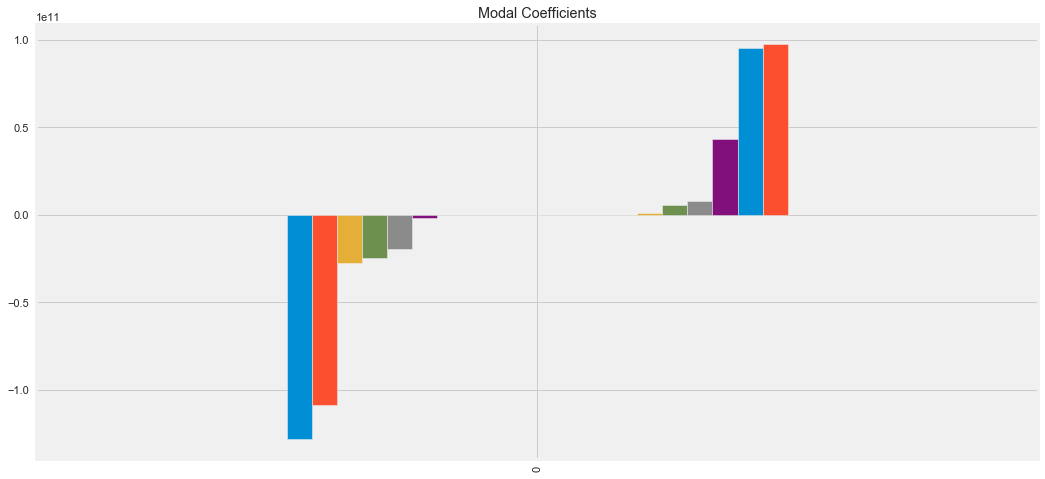

In [603]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

### 5.6) Evaluate the training and test predictions using RMSE.

In [3]:
# training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

NameError: name 'x_train' is not defined

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 
#model does not seem to be overfit 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here
#removed sqft_living due to collinearity 

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [8]:
# your code here
#subset preforms better than subset 2 and 3 

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/